<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,71.403767,24.279486,97.870899,37.647197,-153.667523,87.533826,38.295008,49.238818
1,0.0,1.0,68.702960,85.423935,39.232787,61.534332,3717.640499,3982.534512,585.521393,3397.013119
2,0.0,2.0,87.911208,60.528913,92.067806,39.467241,760.094749,1050.069918,426.314689,623.755229
3,0.0,3.0,77.861385,22.174750,56.495679,69.655919,150.670058,386.857791,137.434932,249.422859
4,0.0,4.0,50.032526,99.421118,31.572164,27.479791,332.353431,550.859030,594.537213,-43.678183
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.363824,88.640971,92.770435,40.075112,-82.019602,199.830741,704.482487,-504.651746
59996,999.0,56.0,26.280367,74.080178,88.897844,77.947461,-622.073935,-344.868084,612.722282,-957.590366
59997,999.0,57.0,26.705709,41.575270,75.184922,48.910384,535.933467,738.309752,-42.881431,781.191183
59998,999.0,58.0,37.363199,64.594046,63.259701,80.507670,-776.559413,-520.834797,547.138502,-1067.973299


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    71.403767  24.279486  97.870899  37.647197  -153.667523   
      1.0    68.702960  85.423935  39.232787  61.534332  3717.640499   
      2.0    87.911208  60.528913  92.067806  39.467241   760.094749   
      3.0    77.861385  22.174750  56.495679  69.655919   150.670058   
      4.0    50.032526  99.421118  31.572164  27.479791   332.353431   
...                ...        ...        ...        ...          ...   
999.0 55.0   50.363824  88.640971  92.770435  40.075112   -82.019602   
      56.0   26.280367  74.080178  88.897844  77.947461  -622.073935   
      57.0   26.705709  41.575270  75.184922  48.910384   535.933467   
      58.0   37.363199  64.594046  63.259701  80.507670  -776.559413   
      59.0   39.884863  83.131165  24.090891  89.004353   386.707036   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0      87.533826   38.295008    49.238818  
      1.0    3982.534512  585.521393  3397.013119  
      2.0    1050.069918  426.314689   623.755229  
      3.0     386.857791  137.434932   249.422859  
      4.0     550.859030  594.537213   -43.678183  
...                  ...         ...          ...  
999.0 55.0    199.830741  704.482487  -504.651746  
      56.0   -344.868084  612.722282  -957.590366  
      57.0    738.309752  -42.881431   781.191183  
      58.0   -520.834797  547.138502 -1067.973299  
      59.0    632.818308  926.126776  -293.308467  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    71.403767  24.279486  97.870899  37.647197  -153.667523   
      1.0    68.702960  85.423935  39.232787  61.534332  3717.640499   
      2.0    87.911208  60.528913  92.067806  39.467241   760.094749   
      3.0    77.861385  22.174750  56.495679  69.655919   150.670058   
      4.0    50.032526  99.421118  31.572164  27.479791   332.353431   
...                ...        ...        ...        ...          ...   
999.0 55.0   50.363824  88.640971  92.770435  40.075112   -82.019602   
      56.0   26.280367  74.080178  88.897844  77.947461  -622.073935   
      57.0   26.705709  41.575270  75.184922  48.910384   535.933467   
      58.0   37.363199  64.594046  63.259701  80.507670  -776.559413   
      59.0   39.884863  83.131165  24.090891  89.004353   386.707036   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0      87.533826   38.295008    49.238818  
      1.0    3982.534512  585.521393  3397.013119  
      2.0    1050.069918  426.314689   623.755229  
      3.0     386.857791  137.434932   249.422859  
      4.0     550.859030  594.537213   -43.678183  
...                  ...         ...          ...  
999.0 55.0    199.830741  704.482487  -504.651746  
      56.0   -344.868084  612.722282  -957.590366  
      57.0    738.309752  -42.881431   781.191183  
      58.0   -520.834797  547.138502 -1067.973299  
      59.0    632.818308  926.126776  -293.308467  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,71.403767,24.279486,97.870899,37.647197,-153.667523,87.533826,38.295008,49.238818
1,0.0,1.0,68.702960,85.423935,39.232787,61.534332,3717.640499,3982.534512,585.521393,3397.013119
2,0.0,2.0,87.911208,60.528913,92.067806,39.467241,760.094749,1050.069918,426.314689,623.755229
3,0.0,3.0,77.861385,22.174750,56.495679,69.655919,150.670058,386.857791,137.434932,249.422859
4,0.0,4.0,50.032526,99.421118,31.572164,27.479791,332.353431,550.859030,594.537213,-43.678183
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.363824,88.640971,92.770435,40.075112,-82.019602,199.830741,704.482487,-504.651746
59996,999.0,56.0,26.280367,74.080178,88.897844,77.947461,-622.073935,-344.868084,612.722282,-957.590366
59997,999.0,57.0,26.705709,41.575270,75.184922,48.910384,535.933467,738.309752,-42.881431,781.191183
59998,999.0,58.0,37.363199,64.594046,63.259701,80.507670,-776.559413,-520.834797,547.138502,-1067.973299


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    71.403767  24.279486  97.870899  37.647197  -153.667523   
      1.0    68.702960  85.423935  39.232787  61.534332  3717.640499   
      2.0    87.911208  60.528913  92.067806  39.467241   760.094749   
      3.0    77.861385  22.174750  56.495679  69.655919   150.670058   
      4.0    50.032526  99.421118  31.572164  27.479791   332.353431   
...                ...        ...        ...        ...          ...   
999.0 55.0   50.363824  88.640971  92.770435  40.075112   -82.019602   
      56.0   26.280367  74.080178  88.897844  77.947461  -622.073935   
      57.0   26.705709  41.575270  75.184922  48.910384   535.933467   
      58.0   37.363199  64.594046  63.259701  80.507670  -776.559413   
      59.0   39.884863  83.131165  24.090891  89.004353   386.707036   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0      87.533826   38.295008    49.238818  
      1.0    3982.534512  585.521393  3397.013119  
      2.0    1050.069918  426.314689   623.755229  
      3.0     386.857791  137.434932   249.422859  
      4.0     550.859030  594.537213   -43.678183  
...                  ...         ...          ...  
999.0 55.0    199.830741  704.482487  -504.651746  
      56.0   -344.868084  612.722282  -957.590366  
      57.0    738.309752  -42.881431   781.191183  
      58.0   -520.834797  547.138502 -1067.973299  
      59.0    632.818308  926.126776  -293.308467  

[60000 rows x 8 columns]

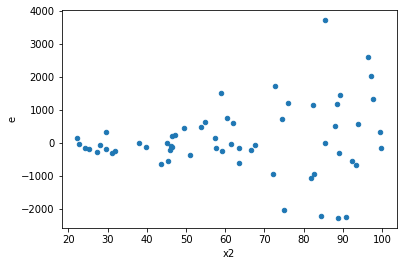

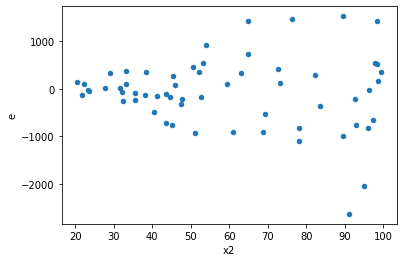

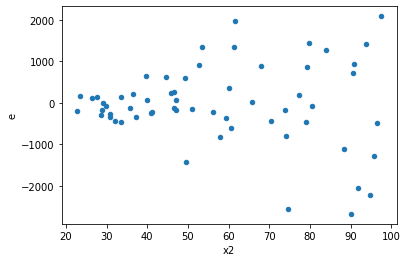

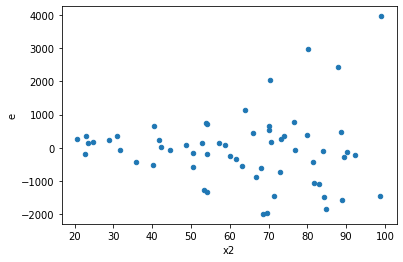

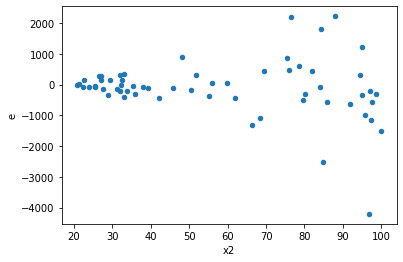

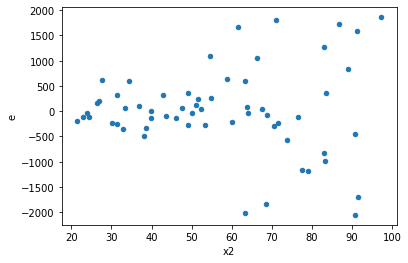

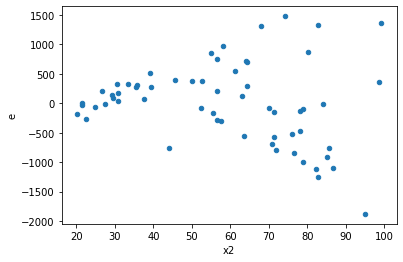

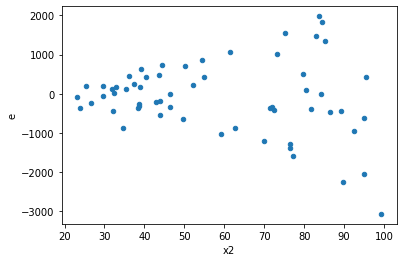

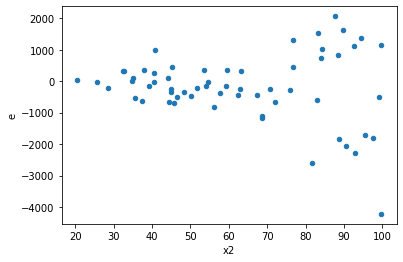

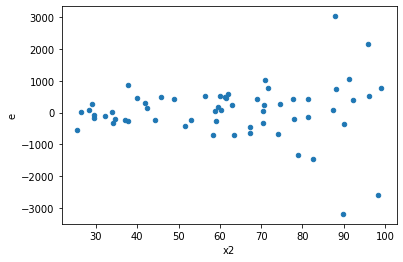

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,23.0,29.0,4697724.891551893,58175985.63874054,204248.90832834318,2006068.4703013978,9.821685152297189,4.9196181350907864e-08,0.9999999754019093,2.4598090675453932e-08,Reject001=0 : Heteroscedasticity
1.0,31.0,21.0,5811850.088257781,18253873.332122263,187479.03510508972,869232.0634343935,4.636422749600525,0.0005312612414571927,0.9997343693792714,0.00026563062072859633,Reject001=0 : Heteroscedasticity
4.0,29.0,23.0,2370226.4470154895,43050713.41693251,81731.94644880998,1871770.148562283,22.901328426511935,6.961498044688597e-11,0.9999999999651925,3.480749022344298e-11,Reject001=0 : Heteroscedasticity
6.0,24.0,28.0,5133063.156755517,12896140.477894226,213877.63153147988,460576.4456390795,2.153457761529816,0.05274536896716153,0.9736273155164192,0.026372684483580766,Reject001=1 : Homoscedasticity
7.0,25.0,27.0,4808156.029149364,41318749.714890875,192326.24116597456,1530324.0635144769,7.95691765323813,8.909431594705808e-07,0.9999995545284203,4.454715797352904e-07,Reject001=0 : Heteroscedasticity
12.0,31.0,21.0,23092411.943059478,21051174.919867788,744916.5142922412,1002436.9009460851,1.3457036885516207,0.4828464790010816,0.7585767604994592,0.2414232395005408,Reject001=1 : Homoscedasticity
16.0,31.0,21.0,19897702.215690218,18566308.31980462,641861.3617964586,884109.9199906962,1.3774157047188913,0.44844444197857936,0.7757777790107103,0.22422222098928968,Reject001=1 : Homoscedasticity
19.0,21.0,31.0,6812257.917419898,23248174.35454497,324393.2341628523,749941.1082111282,2.311827218426639,0.03331406296581996,0.98334296851709,0.01665703148290998,Reject001=1 : Homoscedasticity
21.0,23.0,29.0,11370682.890045222,25196954.882684328,494377.5169584879,868860.5131960113,1.7574838729346345,0.15110966318560304,0.9244451684071985,0.07555483159280152,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,29.0,4697724.891551893,58175985.63874054,204248.90832834318,2006068.4703013978,9.821685152297189,4.9196181350907864e-08,Reject001=0 : Heteroscedasticity
1.0,31.0,21.0,5811850.088257781,18253873.332122263,187479.03510508972,869232.0634343935,4.636422749600525,0.0005312612414571927,Reject001=0 : Heteroscedasticity
2.0,36.0,16.0,32440271.52571966,11348158.55166978,901118.6534922128,709259.9094793613,0.7870882560589347,0.5349214365213608,Reject001=1 : Homoscedasticity
3.0,29.0,23.0,39126154.008063614,24845135.79424629,1349177.7244159868,1080223.2954020125,0.8006530762058086,0.5654877247533264,Reject001=1 : Homoscedasticity
4.0,29.0,23.0,2370226.4470154895,43050713.41693251,81731.94644880998,1871770.148562283,22.901328426511935,6.961498044688597e-11,Reject001=0 : Heteroscedasticity
5.0,18.0,34.0,16274567.16335327,14990216.568514261,904142.6201862928,440888.72260336066,0.4876318323679049,0.10801732382984414,Reject001=1 : Homoscedasticity
6.0,24.0,28.0,5133063.156755517,12896140.477894226,213877.63153147988,460576.4456390795,2.153457761529816,0.05274536896716153,Reject001=1 : Homoscedasticity
7.0,25.0,27.0,4808156.029149364,41318749.714890875,192326.24116597456,1530324.0635144769,7.95691765323813,8.909431594705808e-07,Reject001=0 : Heteroscedasticity
8.0,23.0,29.0,33002202.02089852,24395260.45974771,1434878.3487347183,841215.8779223348,0.5862628554289097,0.19253732107490634,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      603
Reject001=0 : Heteroscedasticity    397
Name: Result_test, dtype: int64